In [1]:
#!pip install konlpy
#!pip install wordcloud

- KoNLPy를 위한 자바 설치    
https://www.codeit.kr/tutorials/43/KoNLPy-%EC%84%A4%EC%B9%98%ED%95%98%EA%B8%B0-Windows

In [45]:
import requests
from bs4 import BeautifulSoup
import re
from konlpy.tag import Okt
from collections import Counter
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import time

- 검색어 및 검색페이지 수 입력

In [42]:
# 검색어 입력
keyword = input("검색어를 입력하세요.")

검색어를 입력하세요.서울밤도깨비야시장


In [43]:
# 검색페이지 입력
lastpage = int(input("마지막 페이지 번호를 입력하세요."))

마지막 페이지 번호를 입력하세요.5


- 다음 뉴스 검색 : 상기 검색어 및 페이지수 활용

In [46]:
titleList = []

for i in range(1, lastpage+1, 1) :
    #url = f"https://search.naver.com/search.naver?where=news&sm=tab_jum&query={keyword}&start=[{i}]"
    url = f"https://search.daum.net/search?w=news&nil_search=btn&DA=PGD&enc=utf8&cluster=y&cluster_page=1&q={keyword}&p={i}"
    print(url)
    response = requests.get(url)
    html = response.text
    soup = BeautifulSoup(html, 'html.parser')
    
    titles = soup.select("ul.c-list-basic")
    #subtitles = soup.select("a.elss.sub_tit")
    
    for title in titles : # titles에서 title
        titleText = title.text # title.text만 추출
        titleList.append(titleText) # titleList에 추가
        
        time.sleep(10)

https://search.daum.net/search?w=news&nil_search=btn&DA=PGD&enc=utf8&cluster=y&cluster_page=1&q=서울밤도깨비야시장&p=1
            헤럴드경제       개별문서메뉴  톡으로 바로 공유 공유하기                 서울시, 코로나 의료진 응원.. '찾아가는 서울 밤도깨비야시장' 진행       보건의 날’을 시작으로 4월 말까지 코로나19 감염병 예방에 힘쓰는 의료진과 구호기관을 찾는다. 푸드트럭은 ‘찾아가는 서울 밤도깨비야시장’이라는 이름으로 12곳 시립병원을 순회하며 5000여명의 의료진을 찾을 계획이다. 7일 서울시에 따르면 ‘찾아가는 서울...    2022.04.07                 뉴시스       개별문서메뉴  톡으로 바로 공유 공유하기                 "28일부터 '서울밤도깨비야시장' 온라인으로 만나세요"       야시장으로 소비자를 다시 찾는다. 서울시는 오는 28일부터 연말까지 온라인 마켓 플랫폼 '아이디어스(www.idus.com)'에서 '서울밤도깨비야시장X아이디어스 기획전'을 개최한다고 21일 밝혔다. 여의도, 반포, 청계천, DDP(동대문디자인플라자) 등에서 열리던 서울밤...    2020.09.21                  헤럴드경제   2020.09.21    "서울밤도깨비야시장, 온라인으로 만나요"               이데일리   2020.09.21    '서울밤도깨비야시장' 28일부터 온라인으로 만나요               키즈맘   2020.09.21    서울밤도깨비야시장, 28일부터 온라인으로 만나요         더보기      이전 컨텐츠보기 다음 컨텐츠보기                경향신문       개별문서메뉴  톡으로 바로 공유 공유하기                 코로나로 18개월째 문 닫은 서울 밤도깨비야시장..푸드트럭은 '희망고문'에 운다       물론 아파트 단지 일일장

https://search.daum.net/search?w=news&nil_search=btn&DA=PGD&enc=utf8&cluster=y&cluster_page=1&q=서울밤도깨비야시장&p=4
            조선일보       개별문서메뉴  톡으로 바로 공유 공유하기           4         주말 저녁에만 만날 수 있는 비밀스런 장터! '서울 밤도깨비 야시장'       하나 둘씩 켜지기 시작한다. 평소 저녁이면 가로등만 홀로 불빛을 비추는 이곳에 볼거리, 먹거리로 가득한 야시장이 들어선 것이다. 바로 '서울 밤도깨비 야시장'이 그곳. 최근 이곳은 세계 각국의 먹거리와 힙합, 버스킹 공연 등을 한 번에 즐길 수 있는 데이트...    2016.07.07                 뉴스1       개별문서메뉴  톡으로 바로 공유 공유하기                 "할로윈데이, 서울밤도깨비야시장에서 즐겨요"       이후 야시장은 동절기 휴식에 들어간다. 2015년 시범운영을 바탕으로 2016년 4곳 상설화, 2017년 6곳 상설화를 거친 서울밤도깨비야시장은 지난 9월말 기준 약 440만여명의 시민이 찾은 것으로 집계됐다. 177대의 푸드트럭과 323팀의 핸드메이드 작가가 참여해 112억...    2017.10.26                 이데일리       개별문서메뉴  톡으로 바로 공유 공유하기                 서울밤도깨비야시장 운영설명회 9일 개최       방문했으며, 참여한 푸드트럭은 189대, 핸드메이드상인은 317개팀, 매출은 총 117억 원이었다. 이번 설명회에서는 올해 서울밤도깨비야시장의 개최장소와 시기부터 참가상인 모집 및 선정 등 운영방향을 논의할 예정이다. 먼저 지속가능한 야시장 운영을 위한 참가비...    2019.01.07                 머니S       개별문서메뉴  톡으로 바로 공유 공유하기                 서울밤도깨비야시장 공개품평회 현장으로 메뉴 맛보러 

In [47]:
titleList[0]

'            헤럴드경제       개별문서메뉴  톡으로 바로 공유 공유하기                 서울시, 코로나 의료진 응원.. \'찾아가는 서울 밤도깨비야시장\' 진행       보건의 날’을 시작으로 4월 말까지 코로나19 감염병 예방에 힘쓰는 의료진과 구호기관을 찾는다. 푸드트럭은 ‘찾아가는 서울 밤도깨비야시장’이라는 이름으로 12곳 시립병원을 순회하며 5000여명의 의료진을 찾을 계획이다. 7일 서울시에 따르면 ‘찾아가는 서울...    2022.04.07                 뉴시스       개별문서메뉴  톡으로 바로 공유 공유하기                 "28일부터 \'서울밤도깨비야시장\' 온라인으로 만나세요"       야시장으로 소비자를 다시 찾는다. 서울시는 오는 28일부터 연말까지 온라인 마켓 플랫폼 \'아이디어스(www.idus.com)\'에서 \'서울밤도깨비야시장X아이디어스 기획전\'을 개최한다고 21일 밝혔다. 여의도, 반포, 청계천, DDP(동대문디자인플라자) 등에서 열리던 서울밤...    2020.09.21                  헤럴드경제   2020.09.21    "서울밤도깨비야시장, 온라인으로 만나요"               이데일리   2020.09.21    \'서울밤도깨비야시장\' 28일부터 온라인으로 만나요               키즈맘   2020.09.21    서울밤도깨비야시장, 28일부터 온라인으로 만나요         더보기      이전 컨텐츠보기 다음 컨텐츠보기                경향신문       개별문서메뉴  톡으로 바로 공유 공유하기                 코로나로 18개월째 문 닫은 서울 밤도깨비야시장..푸드트럭은 \'희망고문\'에 운다       물론 아파트 단지 일일장 등 주요 장터들이 거의 열리지 않았기 때문이다. 주차비 5만원만 다달이 나간다. 서씨는 특히 서울시 밤도깨비야시장이 문을 닫은 걸 아쉬워한다. 동대문디자인플라자(DDP), 

In [48]:
# 한글만 추출
def text_cleaning(text) : # 한글 추출
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
    result = hangul.sub('', text)
    return result

In [49]:
# 전처리 : 한글만 추출
titleList = list(map(lambda x:text_cleaning(x), titleList))

In [50]:
titleList[0]

'            헤럴드경제       개별문서메뉴  톡으로 바로 공유 공유하기                 서울시 코로나 의료진 응원 찾아가는 서울 밤도깨비야시장 진행       보건의 날을 시작으로 월 말까지 코로나 감염병 예방에 힘쓰는 의료진과 구호기관을 찾는다 푸드트럭은 찾아가는 서울 밤도깨비야시장이라는 이름으로 곳 시립병원을 순회하며 여명의 의료진을 찾을 계획이다 일 서울시에 따르면 찾아가는 서울                     뉴시스       개별문서메뉴  톡으로 바로 공유 공유하기                 일부터 서울밤도깨비야시장 온라인으로 만나세요       야시장으로 소비자를 다시 찾는다 서울시는 오는 일부터 연말까지 온라인 마켓 플랫폼 아이디어스에서 서울밤도깨비야시장아이디어스 기획전을 개최한다고 일 밝혔다 여의도 반포 청계천 동대문디자인플라자 등에서 열리던 서울밤                      헤럴드경제       서울밤도깨비야시장 온라인으로 만나요               이데일리       서울밤도깨비야시장 일부터 온라인으로 만나요               키즈맘       서울밤도깨비야시장 일부터 온라인으로 만나요         더보기      이전 컨텐츠보기 다음 컨텐츠보기                경향신문       개별문서메뉴  톡으로 바로 공유 공유하기                 코로나로 개월째 문 닫은 서울 밤도깨비야시장푸드트럭은 희망고문에 운다       물론 아파트 단지 일일장 등 주요 장터들이 거의 열리지 않았기 때문이다 주차비 만원만 다달이 나간다 서씨는 특히 서울시 밤도깨비야시장이 문을 닫은 걸 아쉬워한다 동대문디자인플라자 반포여의도 한강공원 등을 옮겨다니는 밤도깨비야시장에서 장사                     뉴시스       개별문서메뉴  톡으로 바로 공유 공유하기                 연간 만명 찾는 서울 밤도깨비야시장 신종코로나에 개장 연기       디자인플라자 모습  사진

- 텍스트 전처리 : 명사의 빈도수 계산

In [51]:
# 텍스트 전처리
title_corpus = " ".join(titleList) # 말뭉치
nouns_tagger = Okt() # 명사 추출
nouns = nouns_tagger.nouns(title_corpus)
count = Counter(nouns) # 각 명사의 빈도수 계산

In [52]:
# 각 명사의 빈도수 계산
count

Counter({'헤럴드경제': 6,
         '개별': 50,
         '문서': 56,
         '메뉴': 52,
         '톡': 50,
         '바로': 53,
         '공유': 100,
         '서울시': 31,
         '코로나': 5,
         '의료': 5,
         '진': 4,
         '응원': 3,
         '서울': 118,
         '밤': 162,
         '도깨비': 145,
         '야시장': 162,
         '진행': 6,
         '보건': 1,
         '날': 4,
         '시작': 7,
         '월': 20,
         '말': 4,
         '감염병': 1,
         '예방': 1,
         '진과': 1,
         '구호': 1,
         '기관': 2,
         '푸드': 23,
         '트럭': 23,
         '이름': 2,
         '곳': 16,
         '시립': 2,
         '병원': 2,
         '순회': 1,
         '여명': 3,
         '계획': 1,
         '일': 55,
         '뉴시스': 14,
         '온라인': 5,
         '소비자': 1,
         '다시': 2,
         '연말': 1,
         '마켓': 9,
         '플랫폼': 1,
         '아이디': 2,
         '어스': 2,
         '기획전': 1,
         '개최': 12,
         '여의도': 25,
         '반포': 11,
         '청계천': 16,
         '동대문': 12,
         '디자인': 12,
        

- 텍스트 전처리 : 불용어 처리

In [53]:
# 불용어처리명
remove_char_counter = Counter({x:count[x] for x in count if len(x) > 1})

# 불용어 텍스트 파일 경로
korean_stopwords_path = "data/stopwords-ko.txt"

# 불용어 로드
with open(korean_stopwords_path, encoding='UTF-8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]

# 나무위키에서 추가한 불용어
customize_stopwords = ['개별','문서','메뉴','톡','바로','공유','롯데','온','첫','김경','기자','달','일',
                      '버드','특','진행','등','간전','광부','이선우','위','비무장지대','가장자리','길이','뉴스',
                      '다윗','월','베스트','대리점','통해','가장','프라이','빗','그동안','축적','초','매일경제',
                      '언론사','깨달','괜스레'] ##### 개별적 불용어 추가

# 불용어 추가
stopwords.extend(customize_stopwords)

# 불용어 처리
remove_char_counter = Counter({x:remove_char_counter[x] for x in remove_char_counter if x not in stopwords})

In [54]:
remove_char_counter

Counter({'헤럴드경제': 6,
         '서울시': 31,
         '코로나': 5,
         '의료': 5,
         '응원': 3,
         '서울': 118,
         '도깨비': 145,
         '야시장': 162,
         '보건': 1,
         '시작': 7,
         '감염병': 1,
         '예방': 1,
         '진과': 1,
         '구호': 1,
         '기관': 2,
         '푸드': 23,
         '트럭': 23,
         '이름': 2,
         '시립': 2,
         '병원': 2,
         '순회': 1,
         '여명': 3,
         '계획': 1,
         '뉴시스': 14,
         '온라인': 5,
         '소비자': 1,
         '다시': 2,
         '연말': 1,
         '마켓': 9,
         '플랫폼': 1,
         '아이디': 2,
         '어스': 2,
         '기획전': 1,
         '개최': 12,
         '여의도': 25,
         '반포': 11,
         '청계천': 16,
         '동대문': 12,
         '디자인': 12,
         '플라자': 12,
         '이데일리': 3,
         '키즈': 1,
         '보기': 12,
         '이전': 4,
         '컨텐츠': 8,
         '경향신문': 1,
         '개월': 2,
         '희망고문': 1,
         '아파트': 1,
         '일일': 1,
         '주요': 1,
         '장터': 2,
         '리지': 1,
 

- 텍스트 전처리 : 명사의 분석 대상 갯수 지정

In [57]:
# 빈도수 특정 명사의 갯수 지정
ranked_tags = remove_char_counter.most_common(25) # 빈도순 n개 단어

In [58]:
pd.DataFrame(ranked_tags)
#야시장
#도깨비
#서울
#푸드트럭
#한강공원

,0,1
0,야시장,162
1,도깨비,145
2,서울,118
3,서울시,31
4,여의도,25
5,한강,25
6,푸드,23
7,트럭,23
8,운영,20
9,공원,19


- 워드클라우드

In [59]:
####### [WordCloud 오류 해결]
#!pip install --upgrade pip
#!pip install --upgrade Pillow

In [60]:
### 워드클라우드
wc = WordCloud(font_path='data/malgun.ttf', width=1200, height=500,
               scale=4.0, max_font_size=600, background_color='white')
gen = wc.generate_from_frequencies(remove_char_counter)

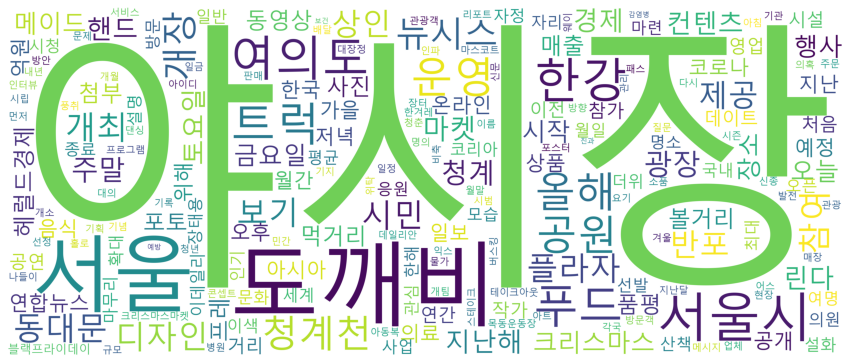

In [61]:
# 워드클라우드 그리기 및 파일로 저장
plt.figure(figsize=(15, 7))
plt.imshow(gen)
plt.axis('off')
plt.savefig(f'data/daumNews_wc_{keyword}.png')